<a href="https://colab.research.google.com/github/AnabelleSouza/CRUD_PDO-CONTEINER/blob/main/census_income_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AULA 5

In [24]:
pip install ucimlrepo

In [25]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pymc as pm
import arviz as az
import pandas as pd

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Sep 09 2024', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [26]:
# # Verifique se 'y' foi carregado corretamente como uma série
print(X.shape)
print(y.shape)

# # Certifique-se de que y está no formato correto (1D)
y = y.squeeze()

# # Verifique novamente o formato de y
print(y.shape)

(48842, 14)
(48842, 1)
(48842,)


In [27]:


# Verifique as colunas que são categóricas
categorical_columns = X.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder para transformar categorias em números
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Verifique se todas as colunas foram transformadas
print(X.head())




   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  
0              40              39  
1              13              39  
2              40              39  
3       

<ipython-input-27-681ab5023f9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-27-681ab5023f9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-27-681ab5023f9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [28]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
# Preprocessing: convert target 'y' to binary
y = y.apply(lambda x: 1 if '>50K' in x else 0)

# Verifique as primeiras linhas de y para confirmar as mudanças
print(y.head())


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64


In [30]:
# Remover qualquer ponto final nos valores de y_train
y_train = y_train.replace('.', '', regex=False)
y_test = y_test.replace('.', '', regex=False)

# Mapear valores para 0 e 1
y_train = y_train.map({'<=50K': 0, '>50K': 1})
y_test = y_test.map({'<=50K': 0, '>50K': 1})

# Verifique se a conversão foi bem-sucedida
print(y_train.unique())
print(y_test.unique())


[nan  0.  1.]
[ 0. nan  1.]


In [31]:
# Definir as coordenadas das features usando os nomes das colunas
cols = list(X.columns)
coords = {'features': cols}

# Exibir as coordenadas para conferência
print(coords)


{'features': ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']}


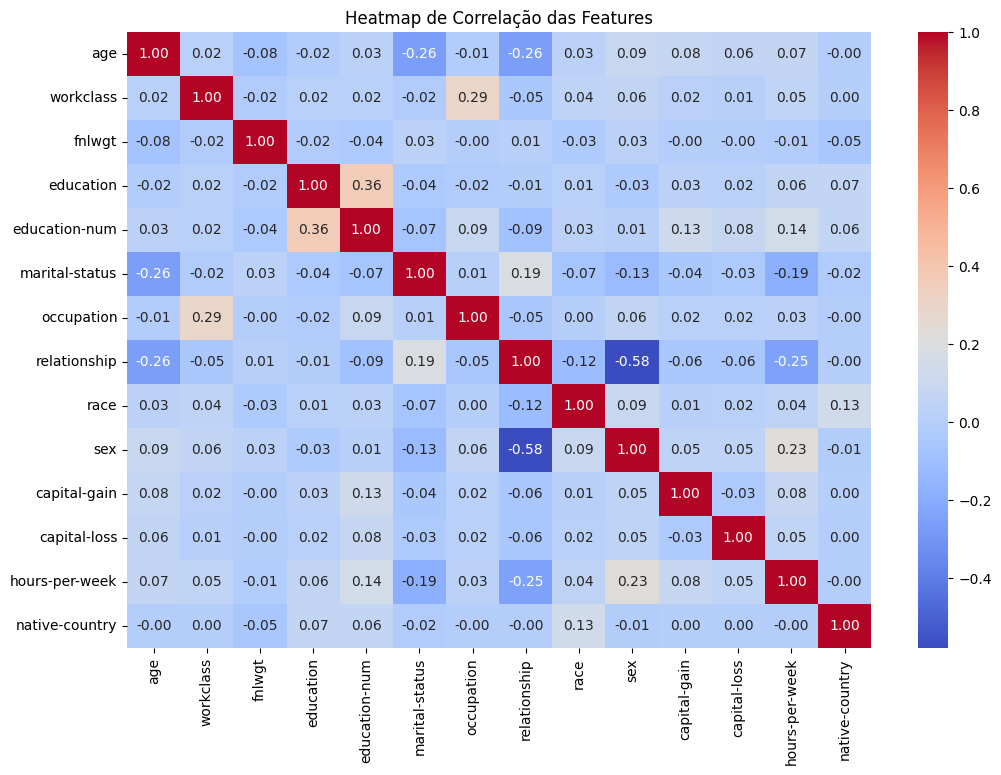

In [32]:
# Plotar o heatmap de correlação entre as features de X_f
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap de Correlação das Features')
plt.show()

In [33]:
y_train = y_train.fillna(y_train.mean())


# Definir o modelo com X e y como variáveis compartilhadas
with pm.Model() as censusIncome_model:
    X_shared = pm.Data('X', X_train_scaled)  # Definir X com os dados de treino
    y_shared = pm.Data('y', y_train)  # Definir y com os dados de treino

    # Priors para os pesos e bias
    priors = pm.Normal('w', mu=0, sigma=1, shape=X_train_scaled.shape[1])
    bias = pm.Normal('bias', mu=0, sigma=1)

    # Likelihood (probabilidade condicional) baseada em X_shared e priors
    logits = pm.math.dot(X_shared, priors) + bias
    likelihood = pm.Bernoulli('likelihood', logit_p=logits, observed=y_shared)

    # Amostragem do posterior
    trace = pm.sample(1000, tune=1000)


Output()

Output()

In [34]:
with censusIncome_model:
    prior_samples = pm.sample_prior_predictive()

In [35]:
# Verificar o conteúdo dentro do grupo 'prior'
print(prior_samples['prior'].keys())


KeysView(<xarray.Dataset> Size: 64kB
Dimensions:  (chain: 1, draw: 500, w_dim_0: 14)
Coordinates:
  * chain    (chain) int64 8B 0
  * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * w_dim_0  (w_dim_0) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
Data variables:
    bias     (chain, draw) float64 4kB -0.2616 2.504 1.118 ... 1.61 2.014
    w        (chain, draw, w_dim_0) float64 56kB -0.2672 2.12 ... 0.3893 -1.825
Attributes:
    created_at:                 2024-09-24T21:44:24.308784+00:00
    arviz_version:              0.19.0
    inference_library:          pymc
    inference_library_version:  5.16.2)


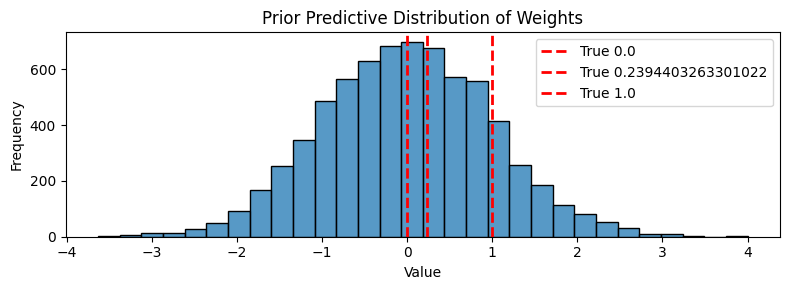

In [36]:


# Acessar as amostras da prior preditiva para os pesos 'w'
prior_samples_w = prior_samples['prior']['w'].values  # Extraímos os valores de 'w'

# Achatar as amostras para facilitar a plotagem
prior_samples_flat = prior_samples_w.flatten()

# Definir valores únicos do conjunto de treino (y_train) para comparação
unique_values = np.unique(y_train)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 3))

# Plotar o histograma das amostras da prior preditiva
sns.histplot(data=prior_samples_flat, bins=30, kde=False, ax=ax)

# Adicionar linhas verticais para os valores únicos em y_train
for value in unique_values:
    ax.axvline(value, color='r', linestyle='--', linewidth=2, label=f'True {value}')

# Adicionar título e rótulos
ax.set_title("Prior Predictive Distribution of Weights")
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")

# Adicionar legenda
ax.legend()

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


In [37]:

with censusIncome_model:
  #approx = pm.fit(2000)
  trace = pm.sample(20000)

Output()

Output()

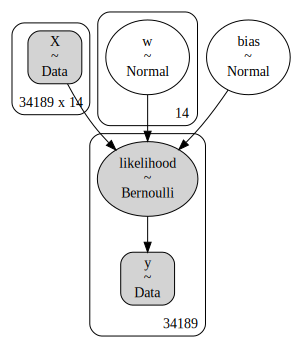

In [38]:

pm.model_to_graphviz(censusIncome_model)


In [39]:

pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bias,-2.138,0.021,-2.179,-2.099,0.0,0.0,67170.0,33127.0,1.0
w[0],0.383,0.019,0.347,0.418,0.0,0.0,80321.0,34171.0,1.0
w[1],-0.131,0.017,-0.163,-0.098,0.0,0.0,76636.0,31291.0,1.0
w[2],0.030,0.017,-0.001,0.061,0.0,0.0,91235.0,30561.0,1.0
w[3],0.048,0.021,0.011,0.089,0.0,0.0,81911.0,31595.0,1.0
w[4],0.692,0.018,0.659,0.727,0.0,0.0,75174.0,33444.0,1.0
w[5],-0.309,0.019,-0.345,-0.273,0.0,0.0,83150.0,31912.0,1.0
w[6],-0.015,0.017,-0.048,0.017,0.0,0.0,80068.0,31778.0,1.0
w[7],-0.157,0.025,-0.203,-0.111,0.0,0.0,60303.0,33122.0,1.0
w[8],0.080,0.019,0.044,0.114,0.0,0.0,82447.0,32264.0,1.0


array([[<Axes: title={'center': 'bias'}>,
        <Axes: title={'center': 'bias'}>],
       [<Axes: title={'center': 'w'}>, <Axes: title={'center': 'w'}>]],
      dtype=object)

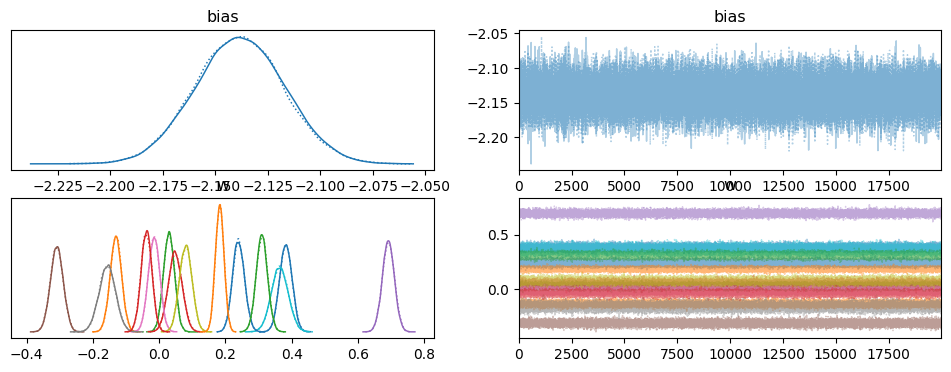

In [40]:

az.plot_trace(trace)

In [41]:
# Verificar os nomes das variáveis no modelo
print(censusIncome_model.named_vars.keys())


dict_keys(['X', 'y', 'w', 'bias', 'likelihood'])


In [42]:

# Atualizar os dados no modelo com os dados de teste
with censusIncome_model:
    pm.set_data({"X": X_test.values, "y": y_test.values})  # Atualiza o X e y com os dados de teste

    # Gerar as amostras da posterior preditiva (sem o argumento 'samples')
    trace_post = pm.sample_posterior_predictive(trace, var_names=['w', 'bias'])

# Verificar as amostras geradas
print(trace_post.keys())


Output()

KeysView(Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data)


/usr/local/lib/python3.10/dist-packages/pymc/pytensorf.py:165: RuntimeWarning: invalid value encountered in cast
  return array_data.astype(x.type.dtype)


In [43]:
# # Verificar as dimensões de X_test_scaled e weights
# print("X_test_scaled shape:", X_test_scaled.shape)
# print("weights shape:", weights.shape)
# print("bias shape:", bias.shape)


In [44]:

# Acessar os pesos e o bias do trace posterior preditivo
weights = trace_post.posterior_predictive['w'].mean(axis=(0, 1)).values  # Converter para numpy array
bias = trace_post.posterior_predictive['bias'].mean(axis=(0, 1)).values  # Converter para numpy array

# Aplicar os pesos e o bias aos dados de teste (X_test)
X_test_scaled = X_test.values  # Certifique-se de que X_test esteja na mesma escala que X_train
mean_likelihood = np.dot(X_test_scaled, weights) + bias  # Calcular a probabilidade média

# Fazer as previsões binárias com base na média (limiar 0.5)
binary_predictions = (mean_likelihood > 0.5).astype(int)

# Comparar com y_test
y_test_flat = y_test.values.flatten()
abs_diff = np.abs(y_test_flat - binary_predictions)
accuracy = 1 - np.mean(abs_diff)

# Criar um DataFrame para visualização
df = pd.DataFrame({'y_test': y_test_flat, 'binary_predictions': binary_predictions})
df['abs_diff'] = abs_diff  # Erros
df['accuracy'] = accuracy  # Acurácia em cada linha (global para o DataFrame)

# Calcular a soma dos erros e a acurácia geral
errors = df["abs_diff"].sum()
acc = (len(df) - errors) / len(df)

# Exibir os resultados
print(f"Acurácia: {acc:.4f}")
print(f"Erros: {errors}")


Acurácia: 0.4946
Erros: 7405.0


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Verificar se há valores NaN em y_test
print(f"Number of NaNs in y_test: {np.isnan(y_test).sum()}")

# Remover os índices onde y_test tem NaN
non_nan_indices = ~np.isnan(y_test)
y_test_clean = y_test[non_nan_indices]
binary_predictions_clean = binary_predictions[non_nan_indices]

Number of NaNs in y_test: 4891


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular as métricas após remover os NaNs
precision = precision_score(y_test_clean, binary_predictions_clean)
recall = recall_score(y_test_clean, binary_predictions_clean)
f1 = f1_score(y_test_clean, binary_predictions_clean)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.2420
Recall: 0.9891
F1 Score: 0.3889
